# Clase 9: Probabilidades

## Definición intuitiva

Describamos la probabilidad con un ejemplo:

Supongamos que lanzamoos un dado y nos preguntamos cuál es la probabilidad de que caiga un número par.

In [1]:
dado = {1, 2, 3, 4, 5, 6}
par = {2, 4, 6}

In [2]:
def prob(evento, espacio):
    ''' 
    Regresa la probabilidad de que ocurra 'evento'.
    Los argumentos deben ser conjuntos.    
    '''
    return (len(evento & espacio)/len(espacio))

In [3]:
prob(par, dado)

0.5

Para un ejemplo menos trivial, consideremos una urna con 23 bolas: 8 blancas, 6 azules, 9 rojas.

In [4]:
def unir(color, numeros):
    return {color + numero for numero in numeros}

urna = unir('B', '12345678') | unir('A', '123456') | unir('R', '123456789')

Se extraen 6 bolas de la urna sin reemplazo.

In [5]:
import itertools

espacio = set(itertools.combinations(urna, 6))

Nos preguntamos cuál es la probabilidad de obtener 6 bolas rojas

In [7]:
def todos_rojos(evento):
    s = [i[0] for i in evento]
    return s.count('R') == 6

rojos = {e for e in espacio if todos_rojos(e)}

In [8]:
prob(rojos, espacio)

0.0008321198252548367

## Simulaciones estilo Monte Carlo de probabilidades

Esto fue un cálculo a fuerza bruta. El problema es que si la urna tiene muchas bolas, el computador no va a ser capaz de calcular todos los elementos del espacio, se hace todo muy lento.

Consideremos una urna con 2300 bolas: 800 blancas, 600 azules y 900 rojas.

In [9]:
def unir(color, numero):
    return {color + str(n + 1) for n in range(numero)}

urna = list(unir('B', 800) | unir('A', 600) | unir('R', 900))

Extraemos 6 bolas

In [ ]:
# Cuidado, correr esto colapsa el computador

espacio = set(itertools.combinations(urna,6))

El problema es que hay demasiadas combinaciones posibles. En estos casos lo que se hace es tomar un número de muestras al azar.

In [10]:
import random

In [104]:
muestra = {tuple(random.choices(urna, k = 6)) for i in range(100000)}

In [105]:
rojos = {e for e in muestra if todos_rojos(e)}

In [106]:
prob(rojos, muestra)

0.00386

In [113]:
import matplotlib.pyplot as plt
import numpy as np

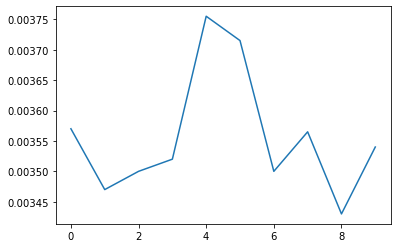

In [143]:
sims = 10
puntos = 200000
probs = np.zeros(sims)

for i in range(sims):
    muestra = {tuple(random.choices(urna, k = 6)) for i in range(puntos)}
    rojos = {e for e in muestra if todos_rojos(e)}
    probs[i] = prob(rojos, muestra)

plt.plot(np.arange(sims), probs)

In [144]:
probs.mean()

0.0035564999999999998

In [145]:
probs.std()/probs.mean()

0.027585648379431504

## Propiedades de la probabilidad

Definimos primero la probabilidad condicional de que ocurra $A$ dado que ocurre $B$: $P(A|B)$

In [146]:
def prob_cond(A, B, espacio):
    ocurreB = espacio & B
    return len(A & ocurreB)/len(ocurreB)

Por ejemplo, la probabilidad de que al lanzar un dado dos veces el segundo resultado sea par dado que la suma de ambos es 6.

In [157]:
dado = {'1','2','3','4','5','6'}
espacio = {i + j for i in dado for j in dado}

In [158]:
suma6 = {e for e in espacio if int(e[0]) + int(e[1]) == 6}
segundoPar = {e for e in espacio if int(e[1])%2 == 0}

In [161]:
prob_cond(segundoPar, suma6, espacio)

0.4

Ahora otro problema, ¿cuál es la probabilidad de que la suma sea 6 y el segundo resultado sea par?

In [168]:
def prob_sim(A, B, espacio):
    ocurrenAyB = A & B
    return prob(ocurrenAyB, espacio)

In [169]:
prob_sim(suma6, segundoPar, espacio)

0.05555555555555555

In [170]:
prob_cond(segundoPar, suma6, espacio)*prob(suma6, espacio)

0.05555555555555556

Esto tiene mucho sentido intuitivo y es una propiedad general: 

$$
P(AB) = P(A|B)P(B)
$$

Otro problema, ¿cuál es la probabilidad de que la suma sea 6 o que el segundo resultado sea par?

In [171]:
def prob_o(A, B, espacio):
    ocurrenAoB = A | B
    return prob(ocurrenAoB, espacio)

In [172]:
prob_o(suma6, segundoPar, espacio)

0.5833333333333334

In [177]:
prob(suma6, espacio) + prob(segundoPar, espacio) - prob_sim(suma6, segundoPar, espacio)

0.5833333333333333

De nuevo tiene sentido intuitivo y escribimos

$$
P(A\cup B) = P(A) + P(B) - P(AB)
$$

Decimos que dos eventos son independientes cuando $P(A|B) = P(A)$. En ese caso $P(AB) = P(A)P(B)$.

Decimos que dos eventos son mutuamente excluyentes cuando $P(AB) = 0$. En ese caso $P(A\cup B) = P(A) + P(B)$.

## Teorema de Bayes

Este teorema es tal vez el teorema famoso más sencillo de demostrar:

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

**Demostración:**

$$
P(AB) = P(BA)
$$

entonces

$$
P(A|B)P(B) = P(B|A)P(A)
$$

Para ver un ejemplo de su poder, supongamos que sabemos que los estudiantes de física son $70$ hombres y $30$ mujeres mientras que los estudiantes de química son $141$ hombres y $153$ mujeres. En el pasillo conocemos a un estudiante que está hablando de átomos (tal que es de física o química). Si este estudiante es mujer, ¿cuál es la probabilidad de que sea de física?

Queremos calcular $P(física|mujer)$, pero conocemos el objeto al revés $P(mujer|física)$. ¿Cómo lo hacemos?

In [179]:
numero_estudiantes = 141 + 153 + 70 + 30
prob_mujer = (153 + 30)/numero_estudiantes
prob_fisica = 100/numero_estudiantes
prob_mujer_dado_fisica = 30/100

prob_mujer_dado_fisica*prob_fisica/prob_mujer

0.16393442622950818

Hagamos una simulación para confirmarlo

In [11]:
def prob(evento, dist):
    '''
    Calcula la probabilidad de un evento a partir de una distribución. El evento debe ser una función que
    regresa verdadero o falso y la distribución debe ser un diccionario (evento: frecuencia)
    '''
    
    conjunto = {e for e in dist.keys() if evento(e)}
    total = sum(d for d in dist.values())
    frec = sum(dist[e] for e in conjunto)
    return frec/total

In [12]:
dist = {'HF': 70, 'MF': 30, 'HQ': 141, 'MQ': 153}

def mujer(e):
    return e[0] == 'M'

prob(mujer, dist)

0.46446700507614214

In [13]:
def prob_cond(A, B, dist):
    
    conjuntoB = {e for e in dist.keys() if B(e)}
    conjuntoA = {e for e in conjuntoB if A(e)}
    frec_B = sum(dist[e] for e in conjuntoB)
    frec = sum(dist[e] for e in conjuntoA)
    return frec/frec_B

In [14]:
def fisica(e):
    return e[1] == 'F'

prob_cond(fisica, mujer, dist)

0.16393442622950818

In [15]:
prob_cond(mujer, fisica, dist)*prob(fisica, dist)/prob(mujer, dist)

0.16393442622950818

## Tareas

### Tarea 5.1

En el problema de la urna al extraer seis bolas. 

* ¿Cuál es la probabilidad de que las primeras tres bolas no sean rojas?
* ¿Cuál es la probabilidad de sacar dos bolas de cada color?

### Tarea 5.2

Repita el problema de la urna pero con reemplazo. Es decir, luego de sacar cada bola esta se vuelve a poner en la urna. Si se extraen cuatro bolas de la urna, ¿cuál es la probabilidad de que todas sean rojas? Responda este problema escribiendo un código, modificando las funciones escritas en la clase para tomar en cuenta el reemplazo.

### Tarea 5.3

Ejercicio sacado de "Basic Probability Theory", R. B. Ash, Dover, 1970.

Se lanza un dado cargado, con probabilidades de $\{0.1, 0.2, 0.2, 0.3, 0.1, 0.1\}$ de obtener $\{1, 2, 3, 4, 5, 6\}$ respectivamente. Sea $N$ el resultado obtenido al lanzar el dado, luego de lo cual se lanza una moneda $N$ veces. Encuentre la probabilidad condicional de que $N$ sea impar dado que se obtuvo al menos una cara.

**Pista**: Construya primero la distribución de probabilidad con todos los resultados posibles junto con sus probabilidades, y luego use las siguientes funciones que definimos en clase.

### Tarea 5.4

Ejercicio sacado de "Basic Probability Theory", R. B. Ash, Dover, 1970.

En una cierta población, el $20\%$ de las personas tiene una enfermedad. Se hace un examen a los miembros de la población que tiene la característica de dar positivo el $90\%$ de las veces si la persona tiene la enfermedad y el $30\%$ de las veces si la persona no tiene la enfermedad (falso positivo). A los que dan positivo se les suministra una droga que puede causar manchas rojas en la piel en un $20\%$ de los pacientes. 

Si una persona tiene esas manchas rojas. ¿Cuál es la probabilidad de que haya tenido la enfermedad?

### Tarea 5.5

Ejercicio sacado de "Basic Probability Theory", R. B. Ash, Dover, 1970.

De las $100$ personas de una aldea, $50$ siempre dicen la verdad, $30$ siempre mienten y $20$ siempre se niegan a responder. Se toma una muestra de $30$ personas sin reemplazo. Encuentre la probabilidad de que esta muestra contenga $10$ personas de cada categoría.

Para resolver este ejercicio es necesario hacer una simulación estilo Monte Carlo ya que el número de elementos en el espacio de resultados es demasiadoo grande. Estime el error cometido al hacer el cálculo de esta manera y obtenga un error razonable.